In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Business question: What is the best performing suburb in the given timespan (% Increase / median house price)

In [ ]:
# Business Questions for investigating - Finding the area for the 'Investor's Dream':
- Consistent gains across quarters - no dip in price (if possible?)
- Price < Melbourne mean
- Greatest proportional/relative increase in median/average pricing

In [3]:
df = pd.read_excel('Houses-by-suburb_1.xls', usecols= [0,1,2,3,4,5,6,7,8,9], header=1)

In [4]:
df.head()

,SUBURB,Apr- Jun 19,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,No of sales Apr- Jun 20,No of Sales YTD,Change % Apr- Jun 19: Apr-Jun20,Change % Jan - Mar 20: Apr-Jun20
0,ABBOTSFORD,982500,1180000,1027500.0,1230000.0,1050000.0,8.0,24.0,6.9,-14.6
1,ABERFELDIE,1172500,1352500,1650000.0,1732500.0,1375000.0,9.0,17.0,17.3,-20.6
2,AINTREE,570000,575000,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
3,AIREYS INLET,719000,700000,1400000.0,1005000.0,1010000.0,3.0,11.0,40.5,0.5
4,AIRPORT WEST,758000,810500,851000.0,815000.0,798500.0,28.0,51.0,5.3,-2.0


In [5]:
df.info

<bound method DataFrame.info of                                                 SUBURB Apr- Jun 19  \
0                                           ABBOTSFORD      982500   
1                                           ABERFELDIE     1172500   
2                                              AINTREE      570000   
3                                         AIREYS INLET      719000   
4                                         AIRPORT WEST      758000   
..                                                 ...         ...   
745                                         YARRAVILLE      915000   
746                                         YARRAWONGA      376000   
747                                                YEA      417000   
748                                             YINNAR      255000   
749  ^ means there were fewer than 10 sales for the...         NaN   

    Jul - Sep 19  Oct - Dec 19  Jan - Mar 20  Apr- Jun 20  \
0        1180000     1027500.0     1230000.0    1050000.0   
1    

In [6]:
df.columns

Index(['SUBURB', 'Apr- Jun 19', 'Jul - Sep 19', 'Oct - Dec 19', 'Jan - Mar 20',
       'Apr- Jun 20', 'No of sales Apr- Jun 20', 'No of Sales YTD',
       'Change % Apr- Jun 19: Apr-Jun20', 'Change % Jan - Mar 20: Apr-Jun20'],
      dtype='object')

In [7]:
df.isnull().sum().sum()

56

In [8]:
#Checking for null values
df.isnull().sum()

SUBURB                               0
Apr- Jun 19                          1
Jul - Sep 19                         1
Oct - Dec 19                         1
Jan - Mar 20                         1
Apr- Jun 20                          1
No of sales Apr- Jun 20              1
No of Sales YTD                      1
Change % Apr- Jun 19: Apr-Jun20     21
Change % Jan - Mar 20: Apr-Jun20    28
dtype: int64

In [9]:
df.dtypes

SUBURB                               object
Apr- Jun 19                          object
Jul - Sep 19                         object
Oct - Dec 19                        float64
Jan - Mar 20                        float64
Apr- Jun 20                         float64
No of sales Apr- Jun 20             float64
No of Sales YTD                     float64
Change % Apr- Jun 19: Apr-Jun20     float64
Change % Jan - Mar 20: Apr-Jun20    float64
dtype: object

In [10]:
#Checking the first row
df.iloc[:,1]

0       982500
1      1172500
2       570000
3       719000
4       758000
        ...   
745     915000
746     376000
747     417000
748     255000
749        NaN
Name: Apr- Jun 19, Length: 750, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SUBURB                            750 non-null    object 
 1   Apr- Jun 19                       749 non-null    object 
 2   Jul - Sep 19                      749 non-null    object 
 3   Oct - Dec 19                      749 non-null    float64
 4   Jan - Mar 20                      749 non-null    float64
 5   Apr- Jun 20                       749 non-null    float64
 6   No of sales Apr- Jun 20           749 non-null    float64
 7   No of Sales YTD                   749 non-null    float64
 8   Change % Apr- Jun 19: Apr-Jun20   729 non-null    float64
 9   Change % Jan - Mar 20: Apr-Jun20  722 non-null    float64
dtypes: float64(7), object(3)
memory usage: 58.7+ KB


In [12]:
df.isnull()

,SUBURB,Apr- Jun 19,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,No of sales Apr- Jun 20,No of Sales YTD,Change % Apr- Jun 19: Apr-Jun20,Change % Jan - Mar 20: Apr-Jun20
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
745,False,False,False,False,False,False,False,False,False,False
746,False,False,False,False,False,False,False,False,False,False
747,False,False,False,False,False,False,False,False,False,False
748,False,False,False,False,False,False,False,False,False,False


In [13]:
df.iloc[749,:]

SUBURB                              ^ means there were fewer than 10 sales for the...
Apr- Jun 19                                                                       NaN
Jul - Sep 19                                                                      NaN
Oct - Dec 19                                                                      NaN
Jan - Mar 20                                                                      NaN
Apr- Jun 20                                                                       NaN
No of sales Apr- Jun 20                                                           NaN
No of Sales YTD                                                                   NaN
Change % Apr- Jun 19: Apr-Jun20                                                   NaN
Change % Jan - Mar 20: Apr-Jun20                                                  NaN
Name: 749, dtype: object

In [14]:
#Working from another df
df_1 = df.copy()

In [15]:
df_1

,SUBURB,Apr- Jun 19,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,No of sales Apr- Jun 20,No of Sales YTD,Change % Apr- Jun 19: Apr-Jun20,Change % Jan - Mar 20: Apr-Jun20
0,ABBOTSFORD,982500,1180000,1027500.0,1230000.0,1050000.0,8.0,24.0,6.9,-14.6
1,ABERFELDIE,1172500,1352500,1650000.0,1732500.0,1375000.0,9.0,17.0,17.3,-20.6
2,AINTREE,570000,575000,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
3,AIREYS INLET,719000,700000,1400000.0,1005000.0,1010000.0,3.0,11.0,40.5,0.5
4,AIRPORT WEST,758000,810500,851000.0,815000.0,798500.0,28.0,51.0,5.3,-2.0
...,...,...,...,...,...,...,...,...,...,...
745,YARRAVILLE,915000,1010000,986000.0,970300.0,1027500.0,38.0,78.0,12.3,5.9
746,YARRAWONGA,376000,372500,389800.0,401500.0,452500.0,22.0,63.0,20.3,12.7
747,YEA,417000,470500,420000.0,395000.0,421300.0,8.0,15.0,1.0,6.6
748,YINNAR,255000,300000,223000.0,295000.0,374000.0,2.0,8.0,46.7,26.8


In [20]:
df_2 = df_1.drop(df_1.index[749])

In [21]:
df_2.info

<bound method DataFrame.info of            SUBURB Apr- Jun 19 Jul - Sep 19  Oct - Dec 19  Jan - Mar 20  \
0      ABBOTSFORD      982500      1180000     1027500.0     1230000.0   
1      ABERFELDIE     1172500      1352500     1650000.0     1732500.0   
2         AINTREE      570000       575000      620400.0      675000.0   
3    AIREYS INLET      719000       700000     1400000.0     1005000.0   
4    AIRPORT WEST      758000       810500      851000.0      815000.0   
..            ...         ...          ...           ...           ...   
744        YARRAM      227500       224000      249800.0      258000.0   
745    YARRAVILLE      915000      1010000      986000.0      970300.0   
746    YARRAWONGA      376000       372500      389800.0      401500.0   
747           YEA      417000       470500      420000.0      395000.0   
748        YINNAR      255000       300000      223000.0      295000.0   

     Apr- Jun 20  No of sales Apr- Jun 20  No of Sales YTD  \
0      1050000.0 

In [22]:
df_2.describe

<bound method NDFrame.describe of            SUBURB Apr- Jun 19 Jul - Sep 19  Oct - Dec 19  Jan - Mar 20  \
0      ABBOTSFORD      982500      1180000     1027500.0     1230000.0   
1      ABERFELDIE     1172500      1352500     1650000.0     1732500.0   
2         AINTREE      570000       575000      620400.0      675000.0   
3    AIREYS INLET      719000       700000     1400000.0     1005000.0   
4    AIRPORT WEST      758000       810500      851000.0      815000.0   
..            ...         ...          ...           ...           ...   
744        YARRAM      227500       224000      249800.0      258000.0   
745    YARRAVILLE      915000      1010000      986000.0      970300.0   
746    YARRAWONGA      376000       372500      389800.0      401500.0   
747           YEA      417000       470500      420000.0      395000.0   
748        YINNAR      255000       300000      223000.0      295000.0   

     Apr- Jun 20  No of sales Apr- Jun 20  No of Sales YTD  \
0      1050000.

In [23]:
df_2.isnull().sum()

SUBURB                               0
Apr- Jun 19                          0
Jul - Sep 19                         0
Oct - Dec 19                         0
Jan - Mar 20                         0
Apr- Jun 20                          0
No of sales Apr- Jun 20              0
No of Sales YTD                      0
Change % Apr- Jun 19: Apr-Jun20     20
Change % Jan - Mar 20: Apr-Jun20    27
dtype: int64

In [30]:
df_2.dtypes

SUBURB                               object
Apr- Jun 19                          object
Jul - Sep 19                         object
Oct - Dec 19                        float64
Jan - Mar 20                        float64
Apr- Jun 20                         float64
No of sales Apr- Jun 20             float64
No of Sales YTD                     float64
Change % Apr- Jun 19: Apr-Jun20     float64
Change % Jan - Mar 20: Apr-Jun20    float64
dtype: object

In [35]:
#Investigating what the null values are
df_2['Apr- Jun 19'].unique()

array(['982500', '1172500', '570000', '719000', '758000', '491500',
       '1725000', '728000', '307500', '453500', '1380000', '853000',
       '860000', '592500', '755000', '830000', '625000', '210000',
       '557500', '2035000', '530000', '450000', '1181500', '1498500',
       '1050000', '1030000', '815500', '780000', '387000', '180000',
       '790000', '499800', '442500', '290000', '1310000', '1222500',
       '470000', '507500', '350000', '430000', '1310500', '2029000',
       '1626000', '477000', '389000', '262000', '1170000', '500000',
       '678000', '665000', '687500', '296000', '1530000', '573000',
       '683300', '483500', '485000', '770000', '508000', '298000',
       '487500', '1335000', '1135000', '655000', '542500', '90000',
       '586300', '557800', '480000', '1810500', '1369000', '931000',
       '963500', '277500', '960000', '550000', '399000', '187000',
       '630000', '600000', '1490000', '1120200', '946500', '405000',
       '292500', '659000', '2620000', '168

In [43]:
df_2.loc[df_2.Apr- Jun 19.isnull()]

SyntaxError: invalid syntax (<ipython-input-43-1ee3e72cce5a>, line 1)

In [26]:
print(np.min(df_2))

SUBURB                              ABBOTSFORD
Apr- Jun 19                                  -
Jul - Sep 19                                 -
Oct - Dec 19                             67000
Jan - Mar 20                             77500
Apr- Jun 20                              57000
No of sales Apr- Jun 20                      0
No of Sales YTD                              0
Change % Apr- Jun 19: Apr-Jun20          -45.5
Change % Jan - Mar 20: Apr-Jun20           -51
dtype: object


In [27]:
print(np.max(df_2))

SUBURB                                 YINNAR
Apr- Jun 19                            990000
Jul - Sep 19                           997000
Oct - Dec 19                            5e+06
Jan - Mar 20                        5.475e+06
Apr- Jun 20                         5.205e+06
No of sales Apr- Jun 20                   192
No of Sales YTD                           422
Change % Apr- Jun 19: Apr-Jun20           180
Change % Jan - Mar 20: Apr-Jun20         70.9
dtype: object


In [54]:
# Making column names uniform to be able to call them in further code
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower().replace(' ', '_')
        c = c.lower().replace('*', '')
        c = c.lower().replace('?', '')
        c = c.lower().replace('-', '')
        clean_column_names.append(c)
        
    return clean_column_names

In [55]:
df_2.columns = clean_column_name(df_2.columns)

In [56]:
df_2.columns

Index(['suburb', 'apr_jun_19', 'jul__sep_19', 'oct__dec_19', 'jan__mar_20',
       'apr_jun_20', 'no_of_sales_apr_jun_20', 'no_of_sales_ytd',
       'change_%_apr_jun_19:_aprjun20', 'change_%_jan__mar_20:_aprjun20'],
      dtype='object')

In [57]:
 df_2.head()

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
0,ABBOTSFORD,982500,1180000,1027500.0,1230000.0,1050000.0,8.0,24.0,6.9,-14.6
1,ABERFELDIE,1172500,1352500,1650000.0,1732500.0,1375000.0,9.0,17.0,17.3,-20.6
2,AINTREE,570000,575000,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
3,AIREYS INLET,719000,700000,1400000.0,1005000.0,1010000.0,3.0,11.0,40.5,0.5
4,AIRPORT WEST,758000,810500,851000.0,815000.0,798500.0,28.0,51.0,5.3,-2.0


In [58]:
df_2.loc[df_2.apr_jun_19.isin(['-'])]

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
182,CRANBOURNE SOUTH,-,625000,636800.0,637900.0,640000.0,1.0,6.0,0.0,0.3
219,DUNNSTOWN,-,-,607500.0,549900.0,390000.0,1.0,2.0,0.0,-29.1
262,FLOWERDALE,-,285000,405000.0,420000.0,398000.0,2.0,7.0,0.0,-5.2


In [59]:
df_2 = df_2.drop(df_2.index[182])
#I was able to successfully drop the row 182, but couldn't drop any further rows for some reason - I was using the same method as before...

In [61]:
#Finding rows with null, '-' values
df_2.loc[df_2.apr_jun_19.isin(['-'])]

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
219,DUNNSTOWN,-,-,607500.0,549900.0,390000.0,1.0,2.0,0.0,-29.1
262,FLOWERDALE,-,285000,405000.0,420000.0,398000.0,2.0,7.0,0.0,-5.2


In [71]:
df_3 = df_2.drop(df_2.index[219])

In [72]:
df_3.loc[df_3.apr_jun_19.isin(['-'])]

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
219,DUNNSTOWN,-,-,607500.0,549900.0,390000.0,1.0,2.0,0.0,-29.1
262,FLOWERDALE,-,285000,405000.0,420000.0,398000.0,2.0,7.0,0.0,-5.2


In [67]:
df_2 = df_2.drop(df_2.index[262])

In [68]:
df_2.loc[df_2.apr_jun_19.isin(['-'])]

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
219,DUNNSTOWN,-,-,607500.0,549900.0,390000.0,1.0,2.0,0.0,-29.1
262,FLOWERDALE,-,285000,405000.0,420000.0,398000.0,2.0,7.0,0.0,-5.2


In [69]:
print(np.min(df_2))

suburb                            ABBOTSFORD
apr_jun_19                                 -
jul__sep_19                                -
oct__dec_19                            67000
jan__mar_20                            77500
apr_jun_20                             57000
no_of_sales_apr_jun_20                     0
no_of_sales_ytd                            0
change_%_apr_jun_19:_aprjun20          -45.5
change_%_jan__mar_20:_aprjun20           -51
dtype: object


In [75]:
df_2.isnull().sum()

suburb                             0
apr_jun_19                         0
jul__sep_19                        0
oct__dec_19                        0
jan__mar_20                        0
apr_jun_20                         0
no_of_sales_apr_jun_20             0
no_of_sales_ytd                    0
change_%_apr_jun_19:_aprjun20     20
change_%_jan__mar_20:_aprjun20    27
dtype: int64

In [76]:
df_mask = df_2['apr_jun_19'] == '-'
df_2.loc[df_mask, 'apr_jun_19'] = np.NaN

In [77]:
#Changing data type of the rows to be able to start statistical calculations 
df_2['apr_jun_19'] = pd.to_numeric(df_2['apr_jun_19'])

In [78]:
df_2.dtypes

suburb                             object
apr_jun_19                        float64
jul__sep_19                        object
oct__dec_19                       float64
jan__mar_20                       float64
apr_jun_20                        float64
no_of_sales_apr_jun_20            float64
no_of_sales_ytd                   float64
change_%_apr_jun_19:_aprjun20     float64
change_%_jan__mar_20:_aprjun20    float64
dtype: object

In [79]:
df_mask = df_2['jul__sep_19'] == '-'
df_2.loc[df_mask, 'jul__sep_19'] = np.NaN

In [80]:
df_2['jul__sep_19'] = pd.to_numeric(df_2['jul__sep_19'])

In [81]:
df_2.dtypes

suburb                             object
apr_jun_19                        float64
jul__sep_19                       float64
oct__dec_19                       float64
jan__mar_20                       float64
apr_jun_20                        float64
no_of_sales_apr_jun_20            float64
no_of_sales_ytd                   float64
change_%_apr_jun_19:_aprjun20     float64
change_%_jan__mar_20:_aprjun20    float64
dtype: object

In [82]:
df_2.isnull().sum()

suburb                             0
apr_jun_19                         2
jul__sep_19                        1
oct__dec_19                        0
jan__mar_20                        0
apr_jun_20                         0
no_of_sales_apr_jun_20             0
no_of_sales_ytd                    0
change_%_apr_jun_19:_aprjun20     20
change_%_jan__mar_20:_aprjun20    27
dtype: int64

In [83]:
#I tried to calculate the mean of the column while ignoring the null values
df_2.apr_jun_19.nanmean()

AttributeError: 'Series' object has no attribute 'nanmean'

In [116]:
df_2.apr_jun_19.mean()

687537.3819163293

In [87]:
df_2.jul__sep_19.mean()

719304.3126684636

In [88]:
df_2.oct__dec_19.mean()

749540.7806191117

In [89]:
df_2.jan__mar_20.mean()

760026.5141318977

In [91]:
df_2.apr_jun_20.mean()

729737.9542395694

In [99]:
quarter = np.array(['4_19', '1_20', '2_20', '3_20', '4_20'])
price_means = np.array([687537, 719304, 749540, 760026, 729737])

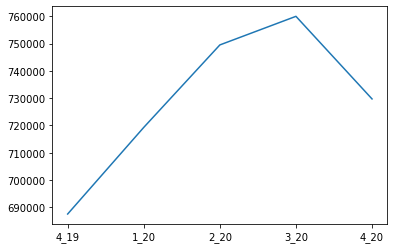

In [103]:
#Plotting the average house price in Melbourne over the 5 sales quarters (15 months)
plt.plot(quarter, price_means)


<Figure size 2160x1440 with 0 Axes>

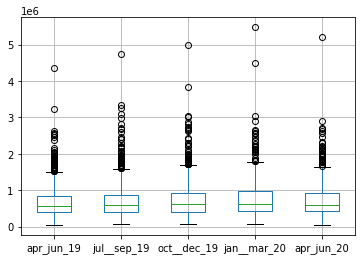

<Figure size 2160x1440 with 0 Axes>

In [109]:
boxplot = df_2.boxplot(column =['apr_jun_19', 'jul__sep_19', 'oct__dec_19', 'jan__mar_20', 'apr_jun_20'])
plt.figure(figsize=(30,20))

In [113]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
apr_jun_19,741.0,687537.381916,454498.987116,45000.0,398800.000,577000.0,844000.00,4350000.0
jul__sep_19,742.0,719304.312668,506605.800014,64500.0,397875.000,592500.0,877250.00,4750000.0
oct__dec_19,743.0,749540.780619,528161.890350,67000.0,410000.000,611000.0,923000.00,5000000.0
jan__mar_20,743.0,760026.514132,524506.104569,77500.0,422650.000,620000.0,966000.00,5475000.0
apr_jun_20,743.0,729737.954240,480454.089330,57000.0,420150.000,600000.0,913150.00,5205000.0
no_of_sales_apr_jun_20,743.0,17.995962,21.264823,0.0,5.000,11.0,22.00,192.0
no_of_sales_ytd,743.0,40.547779,47.137781,0.0,12.000,25.0,51.00,422.0
change_%_apr_jun_19:_aprjun20,723.0,7.758645,18.358599,-45.5,-0.150,6.2,13.80,180.0
change_%_jan__mar_20:_aprjun20,716.0,-2.046229,14.951831,-51.0,-8.525,-2.7,3.75,70.9


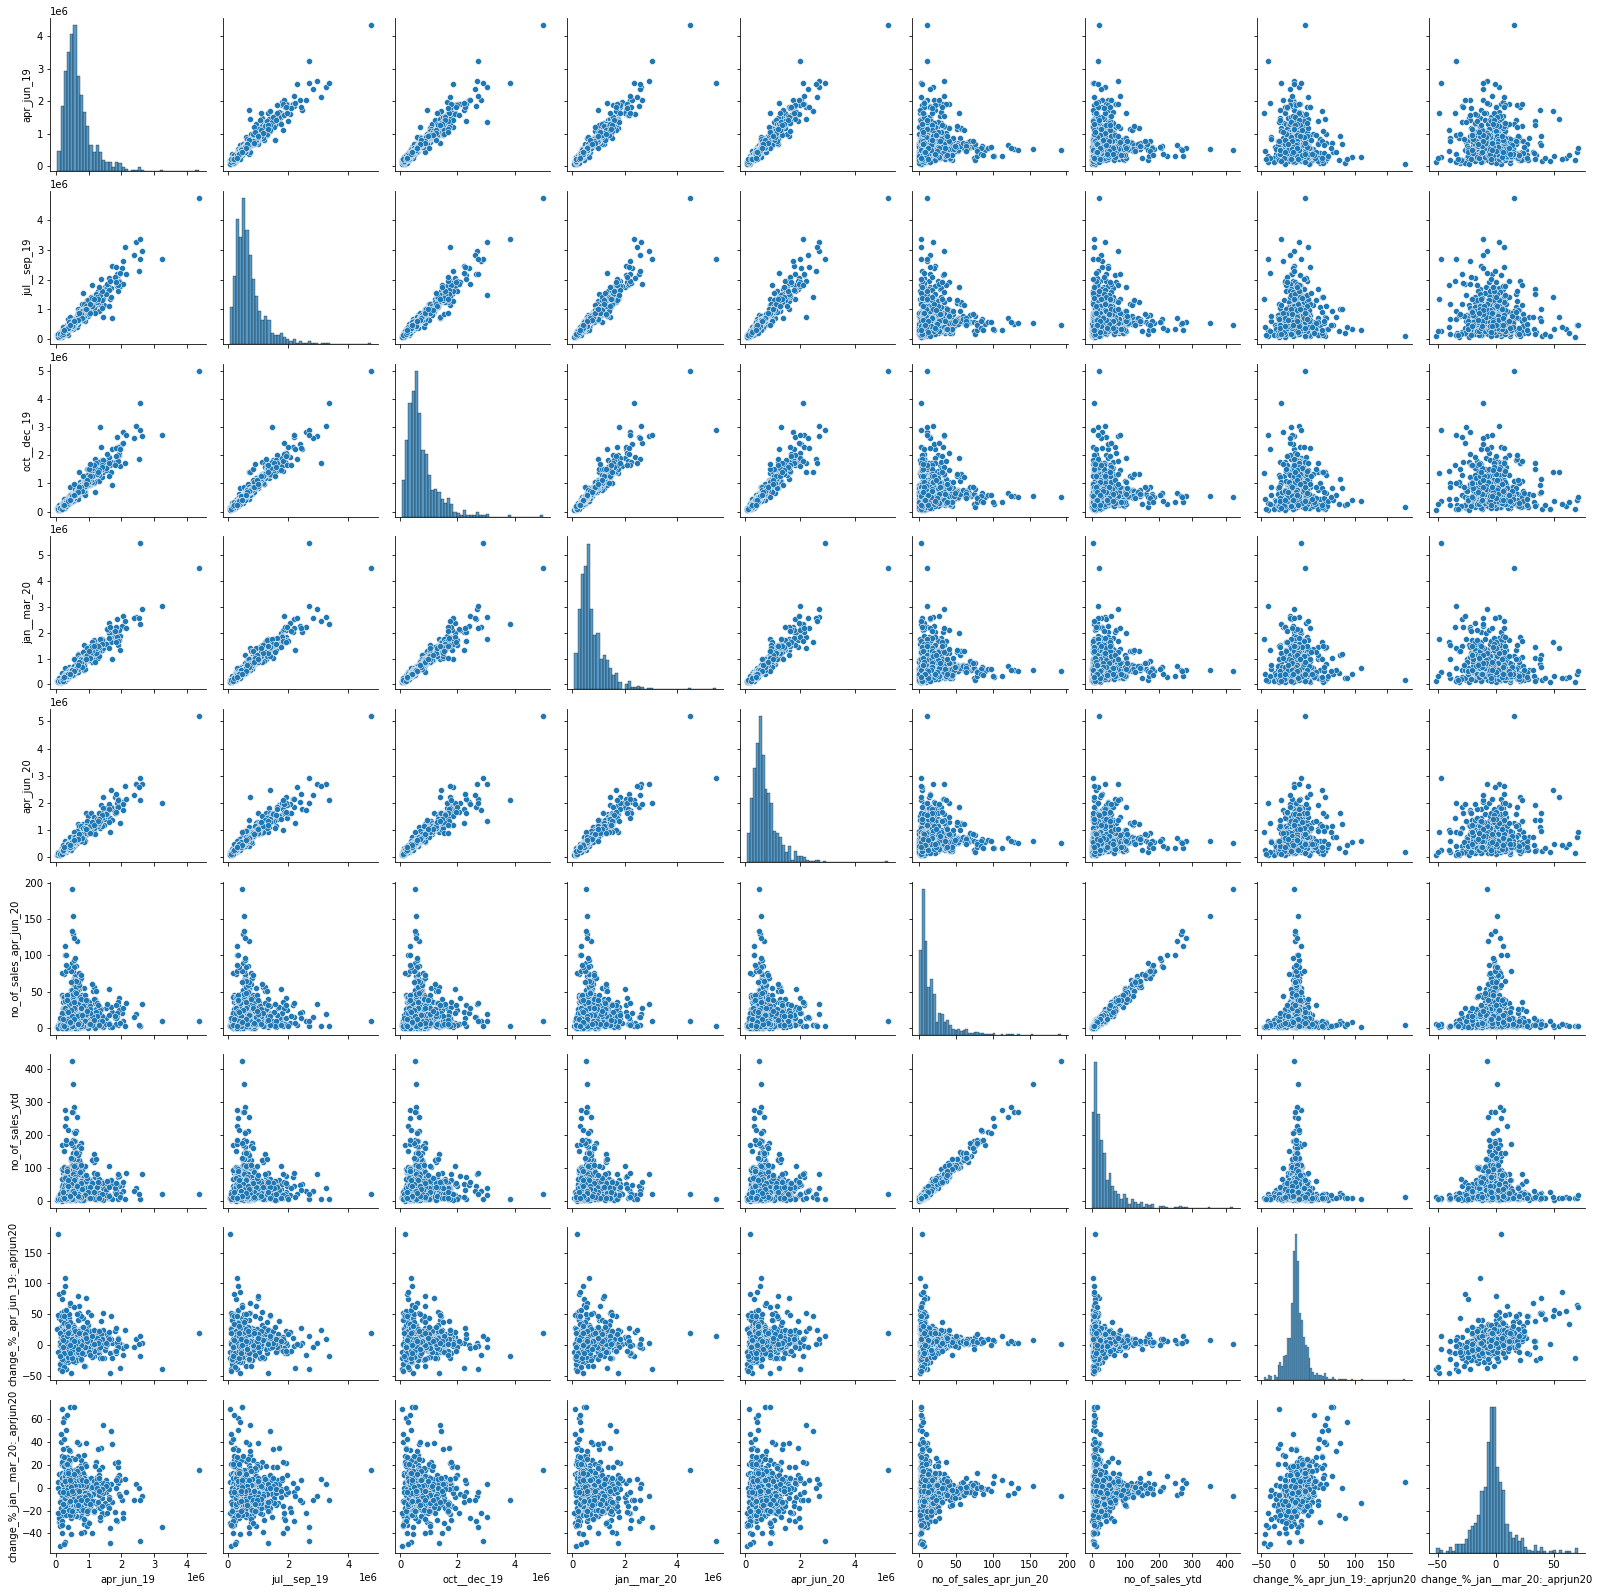

In [121]:
sns.pairplot(df_2)

In [122]:
df_2.apr_jun_19.median()

577000.0

In [127]:
df_2.jul__sep_19.median()

592500.0

In [128]:
df_2.oct__dec_19.median()

611000.0

In [129]:
df_2.jan__mar_20.median()

620000.0

In [130]:
df_2.apr_jun_20.median()

600000.0

In [131]:
price_medians = np.array([577000, 592500, 611000, 620000, 600000])

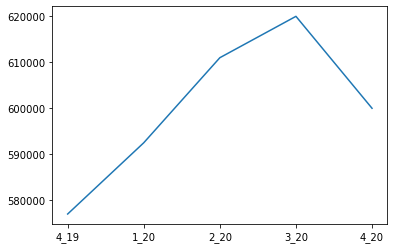

In [132]:
plt.plot(quarter, price_medians)